# França Vs Austrália pela Copa do Mundo do Catar 2022

Uma breve análise da partida que envolveu a última campeã do mundo.

Aqui vamos analisar, principalmente Gols Esperados(xG) e Passes e Toques no último terço de campo

Todos os dados podem ser consultados no link: https://fbref.com/en/matches/539719fd/France-Australia-November-22-2022-World-Cup

## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Coleta dos Dados

In [2]:
url = 'https://fbref.com/en/matches/539719fd/France-Australia-November-22-2022-World-Cup'

In [3]:
match = pd.read_html(url, header=1)

In [4]:
len(match)

20

In [5]:
shots_both_squads = match[17]
shots_both_squads

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,2,Ousmane Dembélé,fr France,0.01,NaN,Blocked,27.0,Left Foot,Volley,Kylian Mbappé,Pass (Dead),Kylian Mbappé,Pass (Live)
1,3,Riley McGree,au Australia,0.05,NaN,Off Target,31.0,Right Foot,NaN,Mitchell Duke,Pass (Live),Mathew Leckie,Pass (Live)
2,9,Craig Goodwin,au Australia,0.25,0.84,Goal,7.0,Left Foot,NaN,Mathew Leckie,Dribble,Harry Souttar,Pass (Live)
3,13,Theo Hernández,fr France,0.01,NaN,Off Target,30.0,Left Foot,Volley,Aurélien Tchouaméni,Pass (Live),Adrien Rabiot,Pass (Live)
4,22,Mitchell Duke,au Australia,0.02,NaN,Off Target,30.0,Right Foot,NaN,NaN,NaN,NaN,NaN
5,26,Antoine Griezmann,fr France,0.06,NaN,Blocked,11.0,Right Foot,NaN,Ousmane Dembélé,Pass (Live),Dayot Upamecano,Pass (Live)
6,27,Adrien Rabiot,fr France,0.18,0.15,Goal,10.0,Head,NaN,Theo Hernández,Pass (Live),Dayot Upamecano,Pass (Live)
7,29,Olivier Giroud,fr France,0.18,NaN,Off Target,9.0,Head,NaN,Antoine Griezmann,Pass (Live),Theo Hernández,Pass (Live)
8,32,Olivier Giroud,fr France,0.80,0.62,Goal,11.0,Right Foot,NaN,Adrien Rabiot,Pass (Live),Kylian Mbappé,Pass (Live)
9,37,Kylian Mbappé,fr France,0.05,NaN,Off Target,17.0,Right Foot,Volley,Ousmane Dembélé,Pass (Live),Benjamin Pavard,Pass (Live)


## Preparação dos Dados (xG)

In [6]:
shots_both_squads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Minute     27 non-null     object 
 1   Player     27 non-null     object 
 2   Squad      27 non-null     object 
 3   xG         27 non-null     float64
 4   PSxG       7 non-null      float64
 5   Outcome    27 non-null     object 
 6   Distance   27 non-null     float64
 7   Body Part  27 non-null     object 
 8   Notes      5 non-null      object 
 9   Player.1   26 non-null     object 
 10  Event      26 non-null     object 
 11  Player.2   24 non-null     object 
 12  Event.1    24 non-null     object 
dtypes: float64(3), object(10)
memory usage: 3.0+ KB


In [7]:
shots_both_squads['Squad'] = shots_both_squads['Squad'].str.slice(start=3)

In [8]:
shots_both_squads.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,2,Ousmane Dembélé,France,0.01,NaN,Blocked,27.0,Left Foot,Volley,Kylian Mbappé,Pass (Dead),Kylian Mbappé,Pass (Live)
1,3,Riley McGree,Australia,0.05,NaN,Off Target,31.0,Right Foot,NaN,Mitchell Duke,Pass (Live),Mathew Leckie,Pass (Live)
2,9,Craig Goodwin,Australia,0.25,0.84,Goal,7.0,Left Foot,NaN,Mathew Leckie,Dribble,Harry Souttar,Pass (Live)
3,13,Theo Hernández,France,0.01,NaN,Off Target,30.0,Left Foot,Volley,Aurélien Tchouaméni,Pass (Live),Adrien Rabiot,Pass (Live)
4,22,Mitchell Duke,Australia,0.02,NaN,Off Target,30.0,Right Foot,NaN,NaN,NaN,NaN,NaN


### Abaixo vamos estipular que os valores xG da equipe visitante seja negativo para melhor visualização 

In [9]:
away_team = 'Australia'
shots_both_squads['xG'] = np.where(shots_both_squads['Squad'] == away_team, shots_both_squads['xG'] * -1, shots_both_squads['xG'])

In [10]:
shots_both_squads.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,2,Ousmane Dembélé,France,0.01,NaN,Blocked,27.0,Left Foot,Volley,Kylian Mbappé,Pass (Dead),Kylian Mbappé,Pass (Live)
1,3,Riley McGree,Australia,-0.05,NaN,Off Target,31.0,Right Foot,NaN,Mitchell Duke,Pass (Live),Mathew Leckie,Pass (Live)
2,9,Craig Goodwin,Australia,-0.25,0.84,Goal,7.0,Left Foot,NaN,Mathew Leckie,Dribble,Harry Souttar,Pass (Live)
3,13,Theo Hernández,France,0.01,NaN,Off Target,30.0,Left Foot,Volley,Aurélien Tchouaméni,Pass (Live),Adrien Rabiot,Pass (Live)
4,22,Mitchell Duke,Australia,-0.02,NaN,Off Target,30.0,Right Foot,NaN,NaN,NaN,NaN,NaN


## Gráficos xG

### Gráfico 1

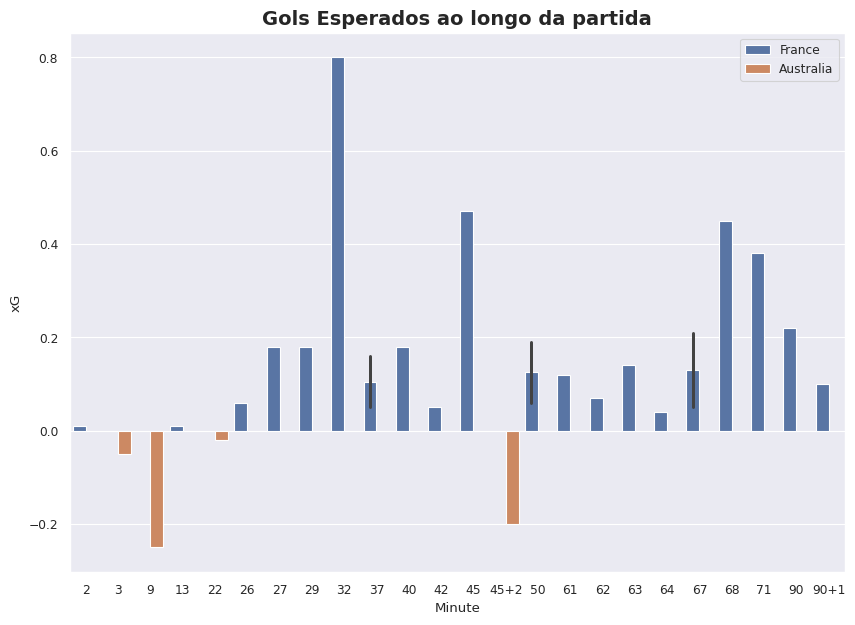

In [12]:
plt.figure(figsize=(10, 7))
plt.title('Gols Esperados ao longo da partida', fontweight='bold', fontsize='14')

sns.set_theme('paper')
sns.barplot(data=shots_both_squads, x='Minute', y='xG', hue='Squad')
plt.legend(loc='upper right');

## Preparação dos dados (Passes)

In [13]:
france = match[4]
france['Squad'] = 'France'
france = france[:-1]
france.tail()

,Player,#,Pos,Age,Min,Cmp,Att,Cmp%,TotDist,PrgDist,...,Cmp%.3,Ast,xAG,xA,KP,1/3,PPA,CrsPA,Prog,Squad
11,Dayot Upamecano,18.0,CB,24-026,90,114,120,95.0,2375,762,...,86.4,0,0.0,0.0,1,16,0,0,10,France
12,Ibrahima Konaté,24.0,CB,23-181,90,88,100,88.0,1560,586,...,58.3,0,0.0,0.0,0,10,0,0,6,France
13,Benjamin Pavard,2.0,RB,26-239,88,82,90,91.1,1249,249,...,33.3,0,0.0,0.0,0,10,0,0,3,France
14,Jules Koundé,5.0,RB,24-010,2,8,9,88.9,149,29,...,100.0,0,0.0,0.0,0,0,0,0,0,France
15,Hugo Lloris,1.0,GK,35-331,90,19,24,79.2,438,311,...,50.0,0,0.0,0.0,0,0,0,0,0,France


In [14]:
australia = match[11]
australia['Squad'] = 'Australia'
australia = australia[:-1]
australia.tail()

,Player,#,Pos,Age,Min,Cmp,Att,Cmp%,TotDist,PrgDist,...,Cmp%.3,Ast,xAG,xA,KP,1/3,PPA,CrsPA,Prog,Squad
11,Kye Rowles,4.0,CB,24-151,90,59,62,95.2,968,303,...,100.0,0,0.0,0.0,0,1,0,0,0,Australia
12,Harry Souttar,19.0,CB,24-031,90,44,53,83.0,664,332,...,25.0,0,0.0,0.0,0,2,0,0,2,Australia
13,Nathaniel Atkinson,3.0,RB,23-162,84,27,34,79.4,396,108,...,25.0,0,0.0,0.0,0,1,0,0,3,Australia
14,Miloš Degenek,2.0,RB,28-208,6,10,10,100.0,157,71,...,NaN,0,0.0,0.0,0,0,0,0,0,Australia
15,Mathew Ryan,1.0,GK,30-228,90,27,34,79.4,783,614,...,58.8,0,0.0,0.0,0,0,0,0,0,Australia


In [15]:
teams = pd.concat([france, australia])
teams = teams[['Squad', '1/3']]
teams

,Squad,1/3
0,France,1
1,France,0
2,France,2
3,France,2
4,France,1
5,France,6
6,France,8
7,France,9
8,France,4
9,France,1


## Gráfico (Passes)

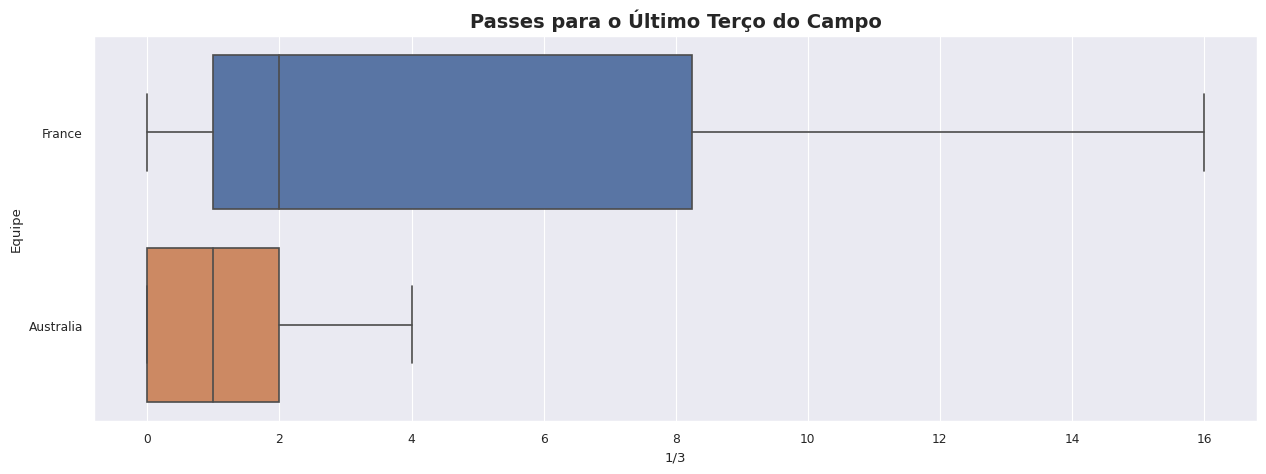

In [16]:
plt.figure(figsize=(15, 5))
plt.title('Passes para o Último Terço do Campo', fontweight='bold', fontsize=14)

sns.set_theme('paper')
sns.boxplot(data=teams, x='1/3', y='Squad')
plt.ylabel('Equipe');